<a href="https://colab.research.google.com/github/FontanaDaniel1/GeoPandas-Tutorial/blob/main/Geo_pandas_tutorial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas

In [ ]:
%matplotlib inline

import pandas as pd
import geopandas

countries = geopandas.read_file("https://github.com/jorisvandenbossche/geopandas-tutorial/blob/main/data/ne_110m_admin_0_countries.zip?raw=true")
countries

In [ ]:
countries.plot() #crea la cartina di tutte le nazioni

In [ ]:
africa = countries[countries['continent'] == 'Europe'] #tutte le nazioni del continente scelto
africa.plot()

In [ ]:
countries.geometry #prende solo la colonna geometria

In [ ]:
print(countries.geometry[2]) #stampa tutta la colonna geometria della nazione in riga 2

I dati vettoriali spaziali possono essere di diversi tipi e i 3 tipi fondamentali lo sono
Dati punto: rappresenta un singolo punto nello spazio.
Line data ("LineString"): rappresenta una sequenza di punti che formano una linea.
Dati poligono: rappresenta un'area piena.

In [ ]:
cities = geopandas.read_file("https://github.com/jorisvandenbossche/geopandas-tutorial/blob/main/data/ne_110m_admin_0_countries.zip?raw=true")
cities

In [ ]:
print(cities.geometry[0]) #stampa tutta la colonna geometria della città in riga 0

POLYGON ((61.210817091725744 35.650072333309225, 62.230651483005886 35.270663967422294, 62.98466230657661 35.40404083916762, 63.19353844590035 35.857165635718914, 63.98289594915871 36.0079574651466, 64.5464791197339 36.31207326918427, 64.7461051776774 37.111817735333304, 65.58894778835784 37.30521678318564, 65.74563073106683 37.66116404881207, 66.21738488145934 37.39379018813392, 66.51860680528867 37.36278432875879, 67.07578209825962 37.35614390720929, 67.82999962755952 37.144994004864685, 68.13556237170138 37.02311513930431, 68.85944583524594 37.344335842430596, 69.19627282092438 37.15114350030743, 69.51878543485796 37.60899669041342, 70.11657840361033 37.58822276463209, 70.27057417184014 37.735164699854025, 70.3763041523093 38.13839590102752, 70.80682050973289 38.486281643216415, 71.34813113799026 38.25890534113216, 71.23940392444817 37.953265082341886, 71.54191775908478 37.905774441065645, 71.44869347523024 37.06564484308052, 71.8446382994506 36.73817129164692, 72.1930408059624 36.9

In [ ]:
rivers = geopandas.read_file("https://github.com/jorisvandenbossche/geopandas-tutorial/blob/main/data/ne_50m_rivers_lake_centerlines.zip?raw=true")
rivers

In [ ]:
print(rivers.geometry[0]) #stampa tutta la colonna geometria della città in riga 0

LINESTRING (51.9371337598152 55.70106609892139, 51.880866467313695 55.68625891701544, 51.82031249962222 55.697455145538584, 51.747601827462404 55.69366250841807, 51.6628417966117 55.608172918745254, 51.57871093775964 55.59943268477065, 51.51342773400279 55.58312409100404, 51.508544921610905 55.52948639548083, 51.48583984403365 55.49640534033426, 51.36914062543957 55.46796295772435, 51.213062548697735 55.50264985760492, 51.13452148447897 55.48273346527725, 51.079345702742046 55.46759674659262, 50.98022460947817 55.46637604371949, 50.83445217522774 55.45630956063775, 50.6883789060617 55.42011139502489, 50.4118652342932 55.401190496444315, 50.07802734358711 55.381122137576654, 49.822167968676865 55.334662176818085, 49.53222656260584 55.260614325191, 49.38232421848795 55.17182037990665, 49.24808475131027 55.11301870345045)


# The shapely library

I singoli oggetti geometrici sono forniti dalla libreria shapely

In [ ]:
type(countries.geometry[0])

shapely.geometry.polygon.Polygon

Le singole geometrie sono rappresentate da oggetti formosi:


1.   Se accedi a una singola geometria di un GeoDataFrame, ottieni un oggetto geometrico ben fatto 

2.   Questi oggetti hanno funzionalità simili agli oggetti geopandas (GeoDataFrame/GeoSeries). Per esempio:

*   single_shapely_object.distance(other_point) -> distanza tra due punti
*   geodataframe.distance(other_point) -> distanza per ogni punto nel geodataframe dall'altro punto




In [ ]:
from shapely.geometry import Point, Polygon, LineString
p = Point(0, 0)
print(p)
polygon = Polygon([(1, 1), (2,2), (2, 1)])
polygon.area
polygon.distance(p)

POINT (0 0)


1.4142135623730951

Tracciare insieme i nostri diversi strati

[(-40.0, 40.0), (-20.0, 60.0)]

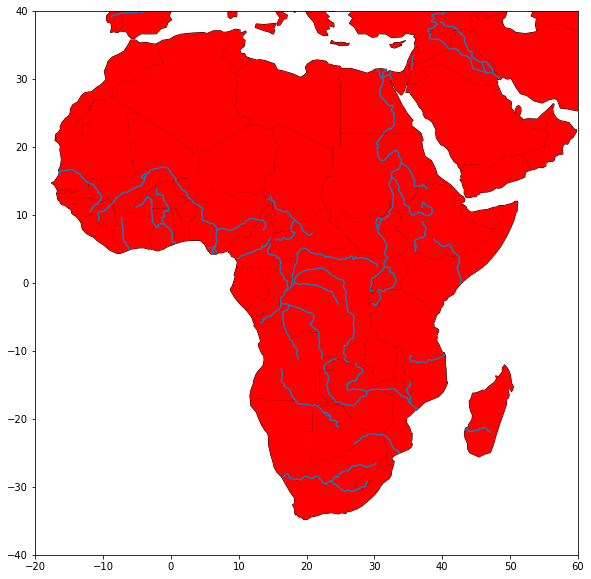

In [ ]:
#fig, ax = plt.subplots(figsize=(15, 10))
ax = countries.plot(edgecolor='k', facecolor='none', figsize=(15, 10))
rivers.plot(ax=ax)
cities.plot(ax=ax, color='red')
ax.set(xlim=(-20, 60), ylim=(-40, 40))

Let's practice!

ESERCIZIO 1:

Inizieremo esplorando il set di dati della stazione per biciclette (disponibile come file GeoPackage: data/paris_bike_stations_mercator.gpkg)

*   Leggere i set di dati delle stazioni in un GeoDataFrame chiamato stazioni.
*   Verificare il tipo dell'oggetto restituito
*   Controlla le prime righe dei dataframe. Che tipo di geometrie contiene   questo set di dati?
*   Quante caratteristiche ci sono nel set di dati?

Suggerimenti

*  Usa type(..) per controllare qualsiasi tipo di oggetto Python
*   La funzione geopandas.read_file() può leggere diversi formati di file geospaziali. Si passa il nome del file come primo argomento.
*   Usa l'attributo .shape per ottenere il numero di caratteristiche







In [ ]:
#punto 1
station = geopandas.read_file("https://github.com/jorisvandenbossche/geopandas-tutorial/blob/main/data/paris_bike_stations_mercator.gpkg?raw=true")
station

In [ ]:
#punto 2
type(station.geometry[0])

shapely.geometry.point.Point

In [ ]:
#punto 3
type(station.geometry)

geopandas.geoseries.GeoSeries

In [ ]:
#punto 4
station.shape #per ottenere il numero di caratteristiche

(1226, 4)

ESERCIZIO 2:

Crea un grafico rapido del set di dati delle stazioni.
Rendi il grafico un po' più grande impostando la dimensione della figura a (12, 6) (suggerimento: il metodo plot accetta una parola chiave figsize).

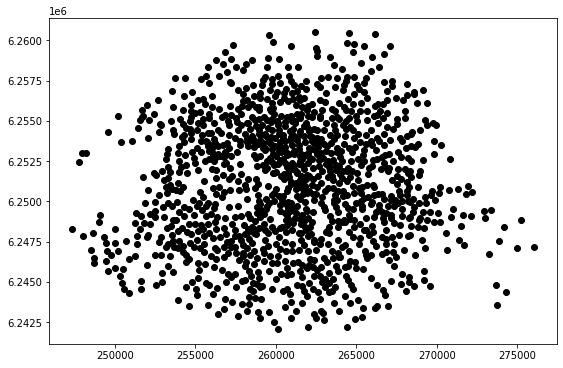

In [ ]:
station.plot(edgecolor='k', facecolor='black', figsize=(12, 6))

ESERCIZIO 3:

*   Importa contextily.(pacchetto)
*   Rifare la figura dell'esercizio precedente: fare un grafico di tutti i punti nelle stazioni, ma assegnare il risultato ad una variabile ax.
*   Imposta la dimensione del marker uguale a 5 per ridurre la dimensione dei punti (usa la parola chiave markersize del metodo plot() per questo).
*  
Utilizzare la funzione add_basemap() di contextily per aggiungere una mappa di sfondo: il primo argomento è l'oggetto assi matplotlib ax.



In [ ]:
#punto 1
!pip install contextily
import contextily

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.9 MB 1.2 MB/s 
     |████████████████████████████████| 55 kB 3.5 MB/s 


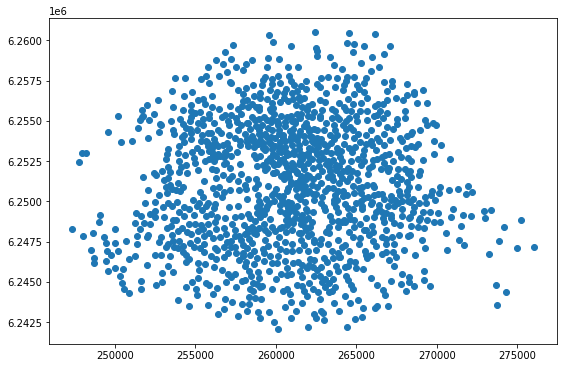

In [ ]:
#punto 2
ax = station.plot(figsize=(12,6)) #grafico con tutte le stazioni

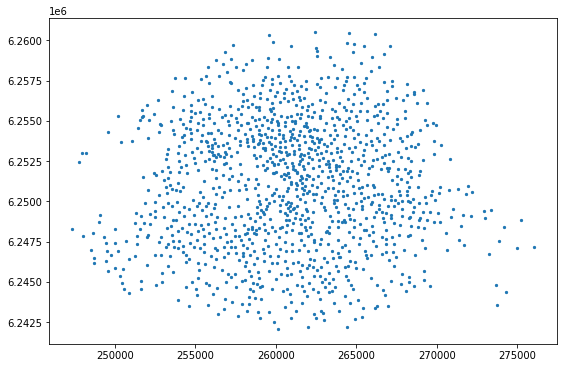

In [ ]:
#punto 3
ax = station.plot(figsize=(12,6), markersize=5)  #riduzione grandezza punti

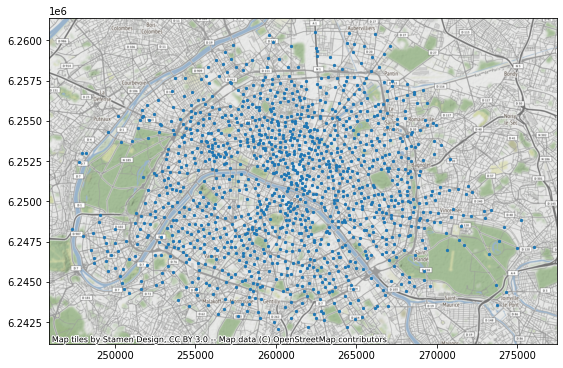

In [ ]:
#punto 4
ax = station.plot(figsize=(12,6), markersize=5) 
contextily.add_basemap(ax)  #aggiunta mappa

ESERCIZIO 4:

* Crea un istogramma che mostri la distribuzione del numero di rastrelliere per biciclette nelle stazioni.

Suggerimenti:
*   La selezione di una colonna può essere effettuata con le parentesi quadre: df['col_name']

*   Le singole colonne hanno un metodo hist() per tracciare un istogramma dei suoi valori.








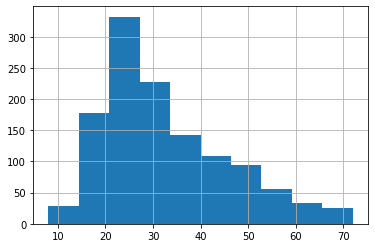

In [ ]:
station['bike_stands'].hist() #hist -- istogramma

ESERCIZIO 5:

Visualizziamo ora dove sono effettivamente stazionate le bici disponibili:


*  Crea un grafico del set di dati delle stazioni (anche con una (12, 6) figsize).
*  Usa le colonne 'available_bikes' per determinare il colore dei punti. Per questo, usa la parola chiave column=.
*  Usa la parola chiave legend=True per mostrare una barra dei colori.






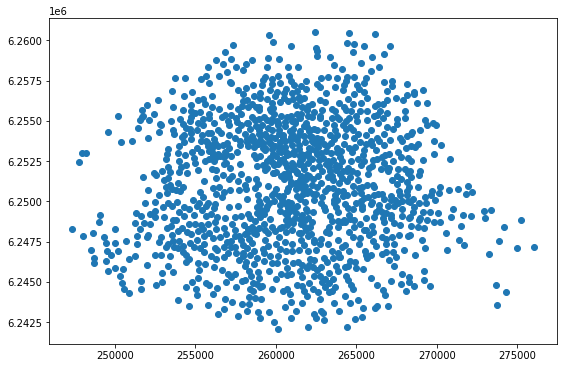

In [ ]:
#punto 1
station.plot(figsize=(12,6))

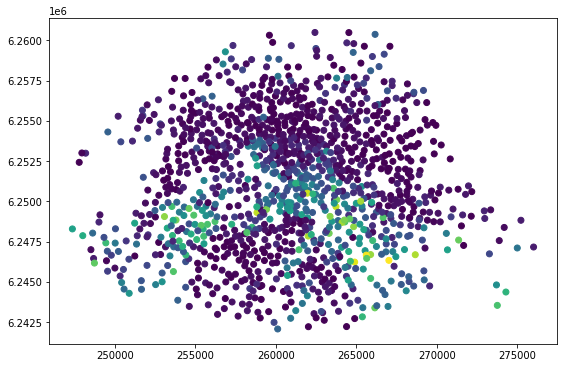

In [ ]:
#punto 2
station.plot(figsize=(12,6), column = 'available_bikes')

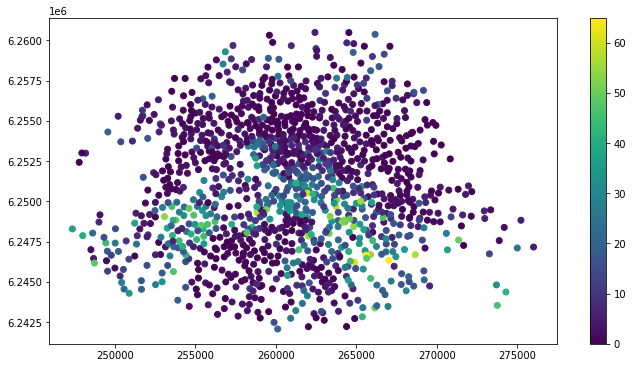

In [ ]:
#punto 3
station.plot(figsize=(12,6), column = 'available_bikes', legend = True)

ESERCIZIO 6:

Successivamente, esploreremo il set di dati sui distretti amministrativi di Parigi (disponibile come file GeoJSON: "data/paris_districts_utm.geojson")


*   Leggere il set di dati in un GeoDataFrame chiamato distretti.
* Controlla le prime righe del dataframe. Che tipo di geometrie contiene questo set di dati?
*  Quante caratteristiche ci sono nel set di dati? (suggerimento: usa l'attributo .shape)
*   Crea un grafico rapido del set di dati dei distretti (imposta la dimensione della figura su (12, 6)).







In [ ]:
#punto 1
districts = geopandas.read_file("https://github.com/jorisvandenbossche/geopandas-tutorial/raw/main/data/paris_districts.geojson")
districts

,id,district_name,population,geometry
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((2.34459 48.85405, 2.34459 48.85405, ..."
1,2,Halles,8984,"POLYGON ((2.34937 48.86058, 2.34822 48.85852, ..."
2,3,Palais-Royal,3195,"POLYGON ((2.33947 48.86214, 2.33912 48.86148, ..."
3,4,Place-Vendôme,3044,"POLYGON ((2.33194 48.86491, 2.33135 48.86399, ..."
4,5,Gaillon,1345,"POLYGON ((2.33632 48.86797, 2.33587 48.86700, ..."
...,...,...,...,...
75,76,Combat,38988,"POLYGON ((2.38834 48.88057, 2.38950 48.87955, ..."
76,77,Belleville,35773,"POLYGON ((2.38323 48.86710, 2.38314 48.86708, ..."
77,78,Saint-Fargeau,42087,"POLYGON ((2.41381 48.87081, 2.41383 48.87066, ..."
78,79,Père-Lachaise,42332,"POLYGON ((2.39536 48.85670, 2.39444 48.85657, ..."


In [ ]:
#punto 2
districts.head() #poligoni

,id,district_name,population,geometry
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((2.34459 48.85405, 2.34459 48.85405, ..."
1,2,Halles,8984,"POLYGON ((2.34937 48.86058, 2.34822 48.85852, ..."
2,3,Palais-Royal,3195,"POLYGON ((2.33947 48.86214, 2.33912 48.86148, ..."
3,4,Place-Vendôme,3044,"POLYGON ((2.33194 48.86491, 2.33135 48.86399, ..."
4,5,Gaillon,1345,"POLYGON ((2.33632 48.86797, 2.33587 48.86700, ..."


In [ ]:
#punto 3
districts.shape
#80 righe, 4 colonne

(80, 4)

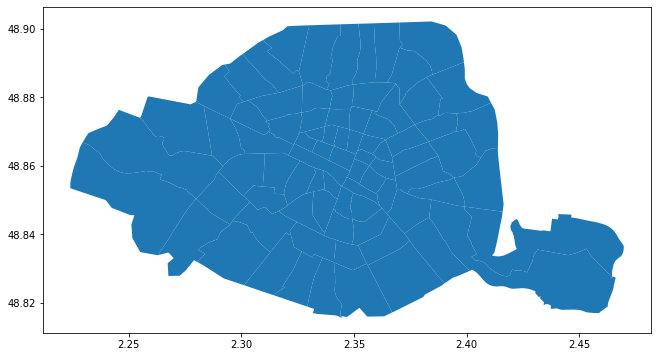

In [ ]:
#punto 4
districts.plot(figsize=(12,6))

ESERCIZIO 7: (nulla)

Quali sono i distretti più grandi (area più grande)?


*  Calcola l'area di ogni distretto.
*   Aggiungi quest'area come nuova colonna al dataframe dei distretti.
*   Ordina il dataframe in base a questa colonna dell'area per i valori dal più grande al più piccolo (decrescente).

Suggerimenti
*  L'aggiunta di una colonna può essere eseguita assegnando valori a una colonna utilizzando la stessa sintassi tra parentesi quadre: df['new_col'] = valori
Per ordinare le righe di un DataFrame, utilizzare il metodo sort_values()
* specificando la colonna in base alla quale eseguire l'ordinamento con la parola chiave by='col_name'. Controlla l'aiuto di questo metodo per vedere come ordinare in ordine crescente o decrescente.







In [ ]:
#punto 1
districts.geometry.area #calcolo dell area di ogni distretto

<ipython-input-34-04eaf1c14a9e>:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  districts.geometry.area #calcolo dell area di ogni distretto


0     0.000107
1     0.000051
2     0.000034
3     0.000033
4     0.000023
        ...   
75    0.000159
76    0.000099
77    0.000182
78    0.000196
79    0.000256
Length: 80, dtype: float64

In [ ]:
#punto 2
districts['area'] = districts.geometry.area / 1e6 #calcolo dell area in km² di ogni distretto
districts
# diviso per 10^6 per mostrare in km²

<ipython-input-35-0c52da985e23>:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  districts['area'] = districts.geometry.area / 1e6 #calcolo dell area in km² di ogni distretto


,id,district_name,population,geometry,area
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((2.34459 48.85405, 2.34459 48.85405, ...",1.065188e-10
1,2,Halles,8984,"POLYGON ((2.34937 48.86058, 2.34822 48.85852, ...",5.055909e-11
2,3,Palais-Royal,3195,"POLYGON ((2.33947 48.86214, 2.33912 48.86148, ...",3.355118e-11
3,4,Place-Vendôme,3044,"POLYGON ((2.33194 48.86491, 2.33135 48.86399, ...",3.303289e-11
4,5,Gaillon,1345,"POLYGON ((2.33632 48.86797, 2.33587 48.86700, ...",2.304947e-11
...,...,...,...,...,...
75,76,Combat,38988,"POLYGON ((2.38834 48.88057, 2.38950 48.87955, ...",1.587869e-10
76,77,Belleville,35773,"POLYGON ((2.38323 48.86710, 2.38314 48.86708, ...",9.888588e-11
77,78,Saint-Fargeau,42087,"POLYGON ((2.41381 48.87081, 2.41383 48.87066, ...",1.823019e-10
78,79,Père-Lachaise,42332,"POLYGON ((2.39536 48.85670, 2.39444 48.85657, ...",1.960105e-10


In [ ]:
#punto 3
districts.sort_values(by='area', ascending=False) #ordinato dal più grande al più piccolo (area)

,id,district_name,population,geometry,area
45,46,Picpus,62947,"POLYGON ((2.41125 48.82966, 2.41195 48.82934, ...",8.826735e-10
60,61,Auteuil,67967,"POLYGON ((2.24922 48.85783, 2.24959 48.85782, ...",7.823705e-10
44,45,Bel-Air,33976,"POLYGON ((2.41388 48.83357, 2.41401 48.83357, ...",7.315900e-10
61,62,Muette,45214,"POLYGON ((2.24562 48.87636, 2.25482 48.87408, ...",6.714914e-10
62,63,Porte-Dauphine,27423,"POLYGON ((2.27098 48.87877, 2.27749 48.87796, ...",3.784335e-10
...,...,...,...,...,...
9,10,Enfants-Rouges,8562,"POLYGON ((2.36710 48.86163, 2.36727 48.86095, ...",3.331213e-11
3,4,Place-Vendôme,3044,"POLYGON ((2.33194 48.86491, 2.33135 48.86399, ...",3.303289e-11
5,6,Vivienne,2917,"POLYGON ((2.34123 48.86580, 2.34118 48.86575, ...",2.985816e-11
11,12,Sainte-Avoie,7501,"POLYGON ((2.35822 48.86122, 2.35690 48.86007, ...",2.614847e-11


ESERCIZIO 8:

*  Aggiungi una colonna 'population_density' che rappresenta il numero di abitanti per chilometro quadrato (Nota: l'area è data in metri quadrati, quindi dovrai moltiplicare il risultato per 10**6).
*  Traccia i distretti usando 'population_density' per colorare i poligoni. Per questo, usa la parola chiave column=.
*  Usa la parola chiave legend=True per mostrare una barra dei colori.





In [ ]:
#punto 1
districts['population_density'] = districts.geometry.area * 1e6
districts

<ipython-input-37-745e0701a677>:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  districts['population_density'] = districts.geometry.area * 1e6


,id,district_name,population,geometry,area,population_density
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((2.34459 48.85405, 2.34459 48.85405, ...",1.065188e-10,106.518765
1,2,Halles,8984,"POLYGON ((2.34937 48.86058, 2.34822 48.85852, ...",5.055909e-11,50.559089
2,3,Palais-Royal,3195,"POLYGON ((2.33947 48.86214, 2.33912 48.86148, ...",3.355118e-11,33.551180
3,4,Place-Vendôme,3044,"POLYGON ((2.33194 48.86491, 2.33135 48.86399, ...",3.303289e-11,33.032894
4,5,Gaillon,1345,"POLYGON ((2.33632 48.86797, 2.33587 48.86700, ...",2.304947e-11,23.049474
...,...,...,...,...,...,...
75,76,Combat,38988,"POLYGON ((2.38834 48.88057, 2.38950 48.87955, ...",1.587869e-10,158.786860
76,77,Belleville,35773,"POLYGON ((2.38323 48.86710, 2.38314 48.86708, ...",9.888588e-11,98.885882
77,78,Saint-Fargeau,42087,"POLYGON ((2.41381 48.87081, 2.41383 48.87066, ...",1.823019e-10,182.301950
78,79,Père-Lachaise,42332,"POLYGON ((2.39536 48.85670, 2.39444 48.85657, ...",1.960105e-10,196.010545


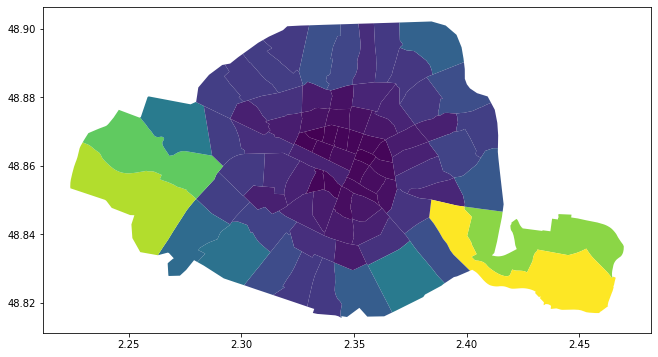

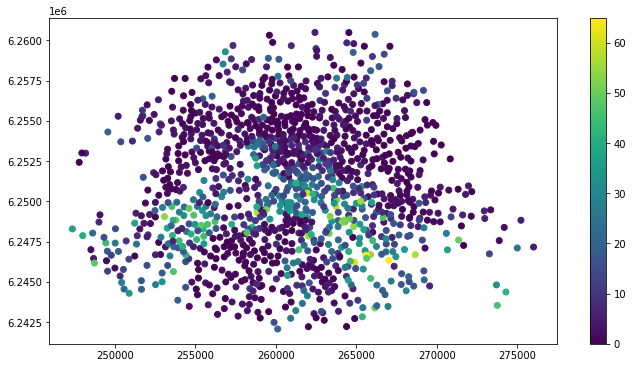

In [ ]:
#punto 2
districts.plot(figsize=(12,6), column = 'population_density') 
station.plot(figsize=(12,6), column = 'available_bikes', legend = True)
#Disegna un grafico dei quartieri colorati in base alla densità di popolazione -- tutorial

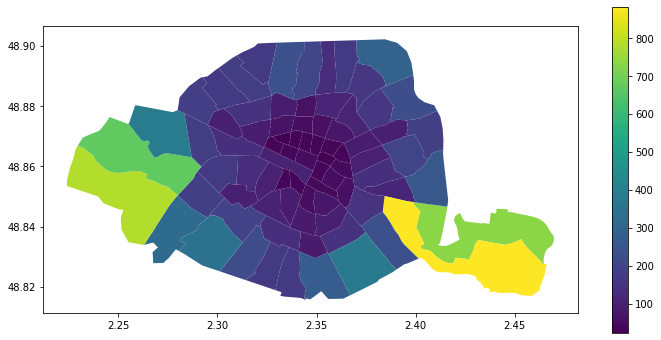

In [ ]:
#punto 3
districts.plot(figsize=(12,6), column = 'population_density', legend = True) #aggiunta legenda